In [211]:
import MySQLdb
import MySQLdb.cursors
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression as LinR
import numpy as np
import sys
import re
%matplotlib inline
import matplotlib as plt
from __future__ import division
from sklearn.decomposition import PCA

In [212]:
conn = MySQLdb.connect(
            user="root",
            passwd="",
            db="Player_Team_Data",
            cursorclass=MySQLdb.cursors.DictCursor)

In [213]:
player = 'lebron james'


def get_fanduel(predict,avg,tru):
    fanduel_pre = predict[0]+predict[2]*1.2+predict[3]*1.5+predict[4]*2+predict[5]*2-predict[6]
    fanduel_avg = avg[0]+avg[2]*1.2+avg[3]*1.5+avg[4]*2+avg[5]*2-avg[6]
    fanduel_tru = tru[0]+tru[2]*1.2+tru[3]*1.5+tru[4]*2+tru[5]*2-tru[6]
    return fanduel_pre, fanduel_avg, fanduel_tru

def get_trend(fan_pre,fan_avg,fan_tru):
    
    if (fan_pre > fan_avg) and (fan_tru > fan_avg):
        val = 1
    elif (fan_pre < fan_avg) and (fan_tru < fan_avg):
        val = 1
    elif (fan_pre < fan_avg) and (fan_tru > fan_avg):
        val = 0
    elif (fan_pre > fan_avg) and (fan_tru < fan_avg):    
        val = 0
    else:
        val = 2
    return val

In [214]:
f_pre = []
f_avg = []
f_tru = []


cmd_target_2015 = 'SELECT PTS,3P,TRB,AST,STL,BLK,TOV FROM NBA_player_data_MP WHERE Player_Name IN (\'' + player + '\') AND Year IN (\'2015\');'
   
    
df_target_2015 = pd.read_sql(cmd_target_2015, con=conn) 

    

In [223]:
df_target_2015=df_target_2015.applymap(lambda x: float(x))
m_PTS = df_target_2015.PTS.mean()
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid') 
plt.rcParams['figure.figsize'] = 14, 10  # plotsize 
m_PTS

25.260869565217391

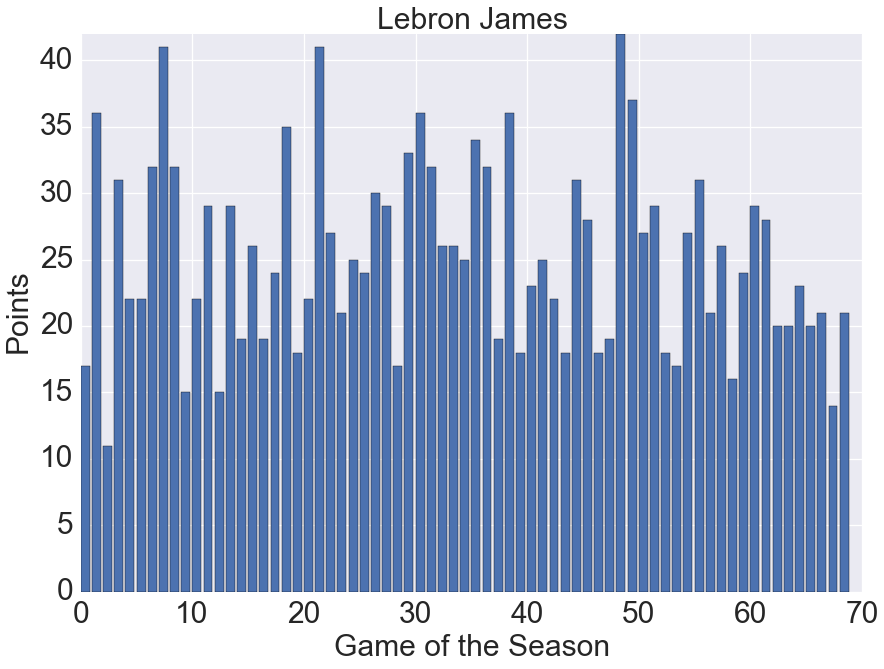

In [226]:
x = range(len(df_target_2015.PTS))
plt.bar( x,(df_target_2015.PTS))


plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.ylabel("Points", fontsize=30)
plt.xlabel("Game of the Season", fontsize=30)
plt.ylim((0,42))
plt.title('Lebron James', fontsize=30)
plt.savefig("lebronPoints.png")

In [217]:
a = [x for x in score if x != 2]

In [218]:
a.count(1)/len(a)



0.5064935064935064

In [219]:
def get_min(x):
    match = re.search('(\w+):(\w+)', x)
    minute = float(match.group(1))
    second = float(match.group(2))/60
    timet = minute+second
    return timet

In [220]:
df_minx = df_min.applymap(lambda x: np.std)
df_minx

,MP
0,<function std at 0x1048efed8>
1,<function std at 0x1048efed8>
2,<function std at 0x1048efed8>
3,<function std at 0x1048efed8>
4,<function std at 0x1048efed8>
5,<function std at 0x1048efed8>
6,<function std at 0x1048efed8>
7,<function std at 0x1048efed8>
8,<function std at 0x1048efed8>
9,<function std at 0x1048efed8>


In [221]:
df_minx.std()

Series([], dtype: float64)